In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.optimize import brentq

# ROUGHWORK

Important Points
* The original method picks p so that 1/2 of events are less extreme, and 1/2 are more extreme (if the guessed p is correct)

Questions To Solve:
* What entropy does the original method maximise?
    * The entropy of q, the cumulative probability? On the [0,1] continuous range of values it is allowed to take?
    * Howcome the binomial entropy expression is used? Is it a shortcut, or can it be linked somehow
* Relate Original Solution to entropy in the n=1 case:
    * For n=0 the max entropy guess is 0.5
    * Then for n=1
        * The original method puts p=0.5 as the guess if outturn is 0
            * and puts p=undefined if outturn is 1
        * Correcting for the discrete nature of the distribution: 
            * guess_p=0.5 is a distribution which puts both k=0 and k=1 outcomes at the median if guess_p=0.5 is true
            * **How does THIS solution relate to entropy?**
* Is Original Solution compatible with entropy in the n=1 case:
    * if n=0 max entropy is 0.5
    * I would expect that knowledge of 1 or 0 should somehow shift your expectations off 0.5
* What prior distribution (and entropy reference) do we end up solving for
    * In the original q=0.5 solution? (I guess it gives the max entropy in quantile space)
        * If you bet this solution how would you fare in the long run? Could some asymmetry in the problem structure make deviating from Q50 a better solution?
    * In my attempted quantile weighted solution?
        * what sort of weighting ends up getting applied?
        * the q=0.5 solution gives a solution which if true makes the observed value a median
        * **the quantile weighted solution gives a solution which**:
            * Intuitively can be explained as what? as what sort of weighting?
            * ~If you sample lots of different distributions
            * how do you end up different from the k/n case as estimate
            * If you bet this solution how would you fare in the long run?
    * In the naive k/n sample fraction approach (how/does this differ from my attempt at weighing quantiles)
        * on average over many samples you'd end up guessing the right p (losses and gains from paying k/n to earn k/n would wash out)

Monte Carlo Testing
* What experiment would you set up to test different solutions to this problem?
* Probably comes down to how you define the payoff, and the source prior distribution? Can you get away from a prior? What way should I think about this, if I believe Bayes doesn't give the right solution to this problem.
    
Related Note:
* If p=0.01 or p=0.5 you see far more observations of larger ks in the latter
* So given that you see an observation of large k it's unlikely you sampled it from a small p
* **Simplified problem**:
    * Suppose only p=0.1 or p=0.5 are possible and you observe k=1 (or k=0) for n=1
    * How do you conclude your problem
    * You could start with both being equally likely
        * And then use bayes theorem?
    * Or you could 
    * just think about how to express the relative frequency of events under p=0.01 and p=0.5
    * Note: Solving this gives a table like in my intro to entropy notes.md (Sending X signal and receiving Y)
        * Here X is either 0.01 or 0.5 (the distribution sent) and Y is 0 or 1 (the signal received)

**Second Simple Problem**
* Suppose true p is 2/2_000 and n=1_000
* Naive Approach
    * Half    of the time you'll see k/n = 1/1_000 and guess 2/2_000 and be right
    * Quarter of the time you'll see k/n = 0/1_000 and guess 0/2_000 and be 1000% low  on event frequency  (low  by 1/1_000)
    * Quarter of the time you'll see k/n = 2/1_000 and guess 4/2_000 and be 1000% high on event frequency (high by 1/1_000)
    * Is this an asymmetry we are trying to correct for in the k/n naive approach?
* Note that for the above case 2/2_000 is the same as 1/1_000
* consider that 1/2_000 case too

Also Review
* Comment about Bayes, try understand it and how that fits in. Explain the problem with starting with p=0.5 and do bayes from there... (if any)

Ergodicity
* Is there an ergodic/vol./CAGR of some solutions over others?

### Simplified Problem

In [368]:
result = [1/51, 99/149, 50/51, 50/149]
result

[0.0196078431372549,
 0.6644295302013423,
 0.9803921568627451,
 0.33557046979865773]

# About: Max Ignorance applied to Bernoulli Trials
Context
* See Nassim Taleb's twitter thread on 19th February about Maximum Ignorance
* Or see his other posts about the ~"Surgeon's Problem"

Given
* Binomial Distribution
* n_samples
* n_failures

Find
* p_event as a function of the observed quantile

### Proposed Extension 
Derive an expected value instead of matching the median for max ignorance

Reasoning:
* we are equally likely to observe any given percentile when sampling from a binomial distribution (a collection of bernoulli trials/coin flips)
* `bernoulli_p` is non linear wrt the binomial distribution percentile observed

In [351]:
# Define parameters
cum_p = 0.5
n_samples = 1057
n_successes = 1

In [358]:
# Define parameters
cum_p = 0.5
n_samples = 2
n_successes = 0

Calculate Cumulative Probability:

In [96]:
bernoulli_p = 1/630  # Value known to give cumulative probability of 0.5 for these parameters

cum_p = binom.cdf(k=n_successes, n=n_samples, p=bernoulli_p)  # args: k, n, p

print("Cumulative Probability:", round(cum_p, 5))

Cumulative Probability: 0.99683


Solve for `bernoulli_p`:

# Sense Check Start

In [285]:
binom.cdf(k=0, n=1, p=0.5)

0.5

In [299]:
def roughwork_plot(func_p, func_kwargs, ax=None, title=None):

    # Generate values for p in the range (0,1)
    p_values = np.linspace(0, 1, 100+1)  # 500 points for smooth curve
    y_values = [func_p(p=p, **func_kwargs) for p in p_values]
    
    sr = pd.Series(data=y_values, index=p_values)
    sr.index.name = 'bernoulli_p'
    
    print(sr)

    # Plot
    ax = sr.plot(grid=True, ax=ax, marker='.', figsize=[15,7], title=title)
        
    return ax


In [303]:
func_kwargs = {
    'k':0,  # n_successes
    'n':1,  # n_samples
}

In [304]:
print(n_successes)
print(n_samples)

0
2


bernoulli_p
0.00    1.00
0.01    0.99
0.02    0.98
0.03    0.97
0.04    0.96
        ... 
0.96    0.04
0.97    0.03
0.98    0.02
0.99    0.01
1.00    0.00
Length: 101, dtype: float64


<AxesSubplot:title={'center':'n_successes=0, n_samples=2'}, xlabel='bernoulli_p'>

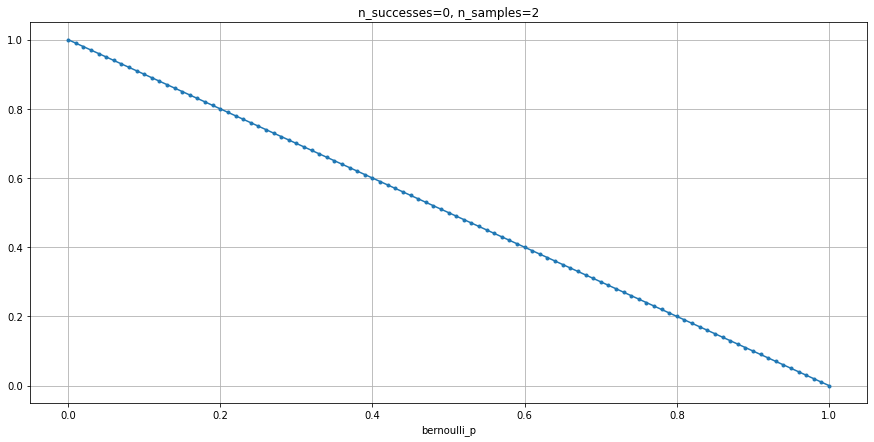

In [305]:
# Plot Binomial CDF EVENT n_successes, n_samples
title = f'{n_successes=}, {n_samples=}'
roughwork_plot(binom.cdf, func_kwargs, title=title)

# Sense Check End

In [359]:
def find_bernoulli_p(target_cum_p, n_successes, n_samples):

    def objective(bernoulli_p, target_cum_p):
        return binom.cdf(n_successes, n_samples, bernoulli_p) - target_cum_p

    # Use brentq to find p in the interval [0, 1]
    bernoulli_p = brentq(objective, 0, 1, args=(target_cum_p,))

    return bernoulli_p

In [360]:
target_cum_p = 0.5

bernoulli_p = find_bernoulli_p(target_cum_p, n_successes, n_samples)
bernoulli_p = round(bernoulli_p, 5)

print("Calculated p:", bernoulli_p)

Calculated p: 0.29289


Plot `bernoulli_p` w.r.t. `cum_p`:

In [361]:
def get_bernoulli_p_by_quantile(n_successes, n_samples):
    """Get bernoulli_p values for each percentile"""

    cum_p_values = np.linspace(0, 1, 1000+1)  # 100+1 gives percentiles

    # Find p_solution for each CDF value
    bernoulli_p_values = [find_bernoulli_p(cum_p, n_successes, n_samples) for cum_p in cum_p_values]
        
    sr = pd.Series(index=cum_p_values, data=bernoulli_p_values)
    sr.index.name = 'cum_p'
    sr.name = 'bernoulli_p'
    
    return sr

In [362]:
median_cum_p = 0.5

median_bernoulli_p = find_bernoulli_p(median_cum_p, n_successes, n_samples)
median_bernoulli_p = round(median_bernoulli_p, 5)
median_bernoulli_p

0.29289

In [363]:
bernoulli_p_sr = get_bernoulli_p_by_quantile(n_successes, n_samples)

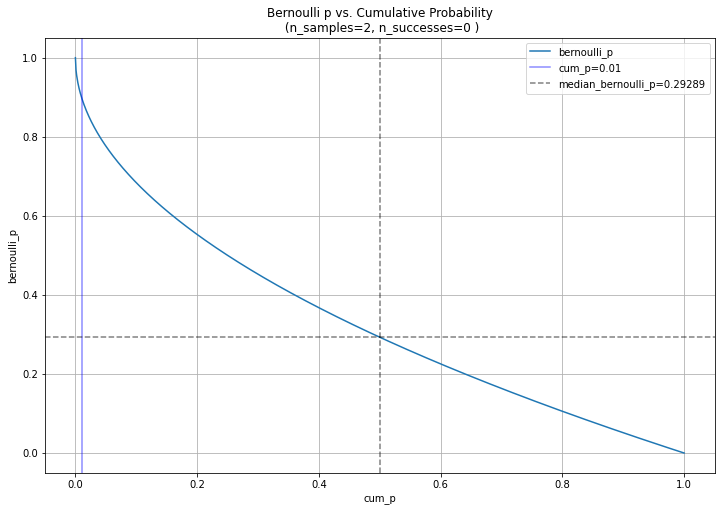

In [364]:
param_values = f'\n ({n_samples=}, {n_successes=} )'
title='Bernoulli p vs. Cumulative Probability' + param_values
ylabel = 'bernoulli_p'
sr = bernoulli_p_sr

ylim=[0, 0.01]
ylim=None

ax = sr.plot(figsize=(12, 8), grid=True, title=title, ylim=ylim, ylabel=ylabel)

context_line_cum_p = 0.01
ax.axvline(context_line_cum_p, color='b', linestyle='-', alpha=0.45, label=f'cum_p={context_line_cum_p}')
ax.axhline(median_bernoulli_p, color='k', linestyle='--', alpha=0.5, label=f'{median_bernoulli_p=}')
ax.axvline(0.5, color='k', linestyle='--', alpha=0.5)
plt.legend(); plt.show()

### Integrate

In [103]:
import numpy as np
from scipy.stats import binom
from scipy.optimize import brentq
from scipy.integrate import quad

def integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples, x_start=0, x_end=1):
    """Integrate the plot if binomial_p (y) which matches to every binomial cumulative p (x)"""

    def objective(p, cum_p):
        return binom.cdf(n_successes, n_samples, p) - cum_p

    # Define the function to solve for p given a cum_p
    def p_func(cum_p):
        return brentq(objective, 0, 1, args=(cum_p,))

    # Perform numerical integration (integrate p with respect to cum_p from 0 to 1)
    integral_result, error = quad(p_func, x_start, x_end)

    return integral_result, error


In [104]:
quantile_split_point = 0.5

integral_result, error = integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples)
integral_result = integral_result
error = round(error,5)
print(f'{error=}')

integral_result_lower, error = integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples, 0, quantile_split_point)
integral_result_lower = round(integral_result_lower, 5)
error = round(error,5)
print(f'{error=}')

integral_result_upper, error = integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples, quantile_split_point, 1)
integral_result_upper = round(integral_result_upper, 5)
error = round(error,5)
print(f'{error=}')

print('\n')

print(f"Integral of p with respect to CDF value: {round(integral_result, 5)}")
print(f"{integral_result_lower = }")
print(f"{integral_result_upper = }")

error=0.0
error=0.0
error=0.0


Integral of p with respect to CDF value: 0.33333
integral_result_lower = 0.2643
integral_result_upper = 0.06904


Check how the integral breaks down for sections of x-axis:

In [105]:
quantile_split_point = 0.01
sub_integral_value, error = integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples, 0, quantile_split_point)

print(f"Sub Integral on (0, {quantile_split_point}) = {sub_integral_value:.5f}.")
print(f"Sub Integral on (0, {quantile_split_point}) contributes {100*sub_integral_value/integral_result:.0f}% of the expected value {integral_result:.5f}.")

Sub Integral on (0, 0.01) = 0.00933.
Sub Integral on (0, 0.01) contributes 3% of the expected value 0.33333.


In [106]:
quantile_split_point = 0.1
sub_integral_value, error = integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples, 0, quantile_split_point)

print(f"Sub Integral on (0, {quantile_split_point}) = {sub_integral_value:.5f}.")
print(f"Sub Integral on (0, {quantile_split_point}) contributes {100*sub_integral_value/integral_result:.0f}% of the expected value {integral_result:.5f}.")

Sub Integral on (0, 0.1) = 0.07892.
Sub Integral on (0, 0.1) contributes 24% of the expected value 0.33333.


In [107]:
quantile_split_point = 0.05
sub_integral_value, error = integrate_binomial_p_wrt_bernoulli_cum_p(n_successes, n_samples, quantile_split_point, 1)

print(f"Sub Integral on ({quantile_split_point}, 1) = {sub_integral_value:.5f}.")
print(f"Sub Integral on ({quantile_split_point}, 1) contributes {100*sub_integral_value/integral_result:.0f}% of the expected value {integral_result:.5f}.")

Sub Integral on (0.05, 1) = 0.29079.
Sub Integral on (0.05, 1) contributes 87% of the expected value 0.33333.


In [108]:
# ROUGHWORK Note
# * Show right to left cumulative average evolves as you approach the large values on the left
# bernoulli_p_sr.loc[::-1].cum_mean()

### Plot again with Expected Value

In [109]:
mean_bernoulli_p = integral_result
mean_bernoulli_p = round(mean_bernoulli_p, 5)

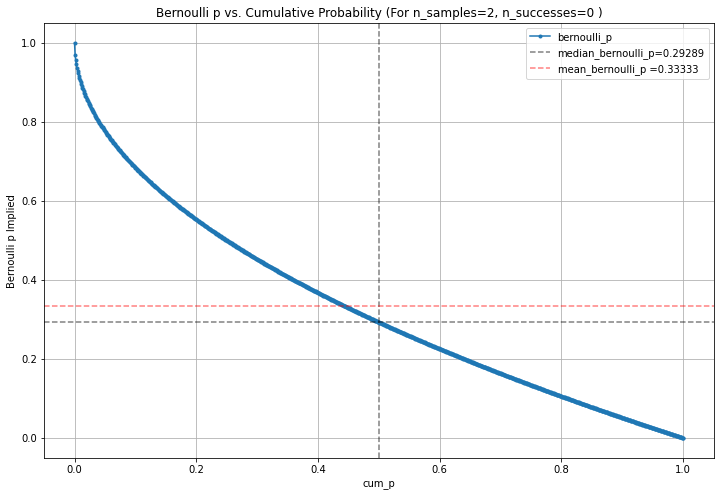

In [112]:
param_values = f' (For {n_samples=}, {n_successes=} )'
title='Bernoulli p vs. Cumulative Probability' + param_values
ylabel = 'Bernoulli p Implied'
sr = bernoulli_p_sr

ylim=None #[0, 0.01]

ax = sr.plot(figsize=(12, 8), grid=True, title=title, ylim=ylim, ylabel=ylabel, marker='.')

# --------------------------------------------------------------------------------------------------------------
# Context Lines

ax.axhline(median_bernoulli_p, color='k', linestyle='--', alpha=0.5, label=f'{median_bernoulli_p=}')
ax.axvline(median_cum_p, color='k', linestyle='--', alpha=0.5)

ax.axhline(mean_bernoulli_p, color='r', linestyle='--', alpha=0.5, label=f'{mean_bernoulli_p =}')
#ax.axhline(mean_cum_p,    color='r', linestyle='--', alpha=0.5)

plt.legend(); plt.show()

In [111]:
print(f'Max Ignorance Median Implies One in {round(1/median_bernoulli_p)}')
print(f'Max Ignorance Mean Implies One in {round(1/mean_bernoulli_p)}')

Max Ignorance Median Implies One in 3
Max Ignorance Mean Implies One in 3


# Extensions
* Suppose you find out that p > x (p has a lower bound)
* Compare my estimated mean_bernoulli_p against bernoulli_p which maximises entropy of binomial distribution(n_samples, n_successes)

# N=2 Entropy Plots

In [133]:
def calculate_1_sample_entropy(p):

    # Probability of each event (0, 1 and 2 of 2 successes)
    p_zero = 1-p
    p_one  = p
    
    probabilities = [p_zero, p_one]
    
    entropy = 0
    for event_p in probabilities:
        entropy += -event_p*np.log2(event_p)
    
    return entropy

In [134]:
def calculate_2_sample_entropy(p):

    # Probability of each event (0, 1 and 2 of 2 successes)
    p_zero = (1-p)**2
    p_one  = p*(1-p)
    p_two = p**2
    
    probabilities = [p_zero, p_one, p_two]
    
    entropy = 0
    for event_p in probabilities:
        entropy += -event_p*np.log2(event_p)
    return entropy

In [175]:
def calculate_3_sample_entropy(p):

    # Probability of each event (0, 1 and 2 of 2 successes)
    p_zero  = (1-p)**3
    p_one   = p*(1-p)*(1-p)
    p_two   = p**2 * (1-p)
    p_three = p**3
    
    probabilities = [p_zero, p_one, p_two, p_three]
    
    entropy = 0
    for event_p in probabilities:
        entropy += -event_p*np.log2(event_p)
    return entropy

In [178]:
n = 5

0
1
2
3
4
5


In [188]:
def calculate_n_sample_entropy(bernoulli_p, n_samples):

    # Probability of each event (0, 1 and 2 of 2 successes)
    event_probabilities = []
    for i in range(n_samples+1):      
        p_event = (bernoulli_p**i) * (1-bernoulli_p)**(n_samples-i)
        event_probabilities.append(p_event)

    # Entropy from probabilities
    entropy = 0
    for event_p in event_probabilities:
        entropy += -event_p*np.log2(event_p)

    return entropy

In [189]:
calculate_1_sample_entropy(p=0.5)

1.0

In [194]:
calculate_n_sample_entropy(bernoulli_p=0.5, n_samples=1)

1.0

In [195]:
calculate_n_sample_entropy(bernoulli_p=0.5, n_samples=2)

1.5

In [204]:
calculate_n_sample_entropy(bernoulli_p=0.5, n_samples=3)

1.5

In [205]:
calculate_3_sample_entropy(p=0.5)

1.5

In [234]:
def plot_pdf(pdf_func, ax=None, n_samples=1):

    # Generate values for p in the range (0,1)
    p_values = np.linspace(0, 1, 5000+1)  # 500 points for smooth curve
    y_values = [pdf_func(p, n_samples) for p in p_values]
    
    sr = pd.Series(data=y_values, index=p_values)

    sr.index.name = 'bernoulli_p'
    sr.name = f'{n_samples}_entropy'
    
    # Plot
    ax = sr.plot(grid=True, ylabel='entropy', figsize=[20, 10], ax=ax, marker='.')
        
    return ax


<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: divide by zero encountered in log2
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: invalid value encountered in double_scalars
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: divide by zero encountered in log2
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: invalid value encountered in double_scalars
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: divide by zero encountered in log2
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: invalid value encountered in double_scalars
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: divide by zero encountered in log2
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: invalid value encountered in do

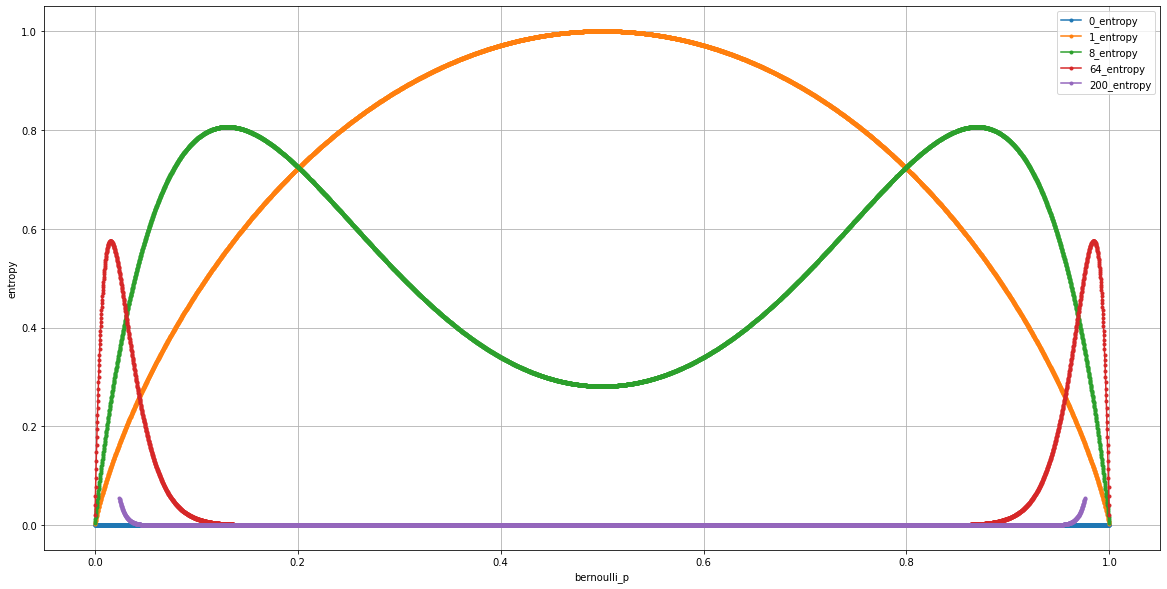

In [235]:
ax = None
for i in [0, 1, 8, 64, 200]:

    ax = plot_pdf(calculate_n_sample_entropy, ax=ax, n_samples=i)

plt.legend(); plt.show()

Figure out:
* Divide by zero problem

<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: divide by zero encountered in log2
  entropy += -event_p*np.log2(event_p)
<ipython-input-188-cbba5fae9ed5>:12: RuntimeWarning: invalid value encountered in double_scalars
  entropy += -event_p*np.log2(event_p)


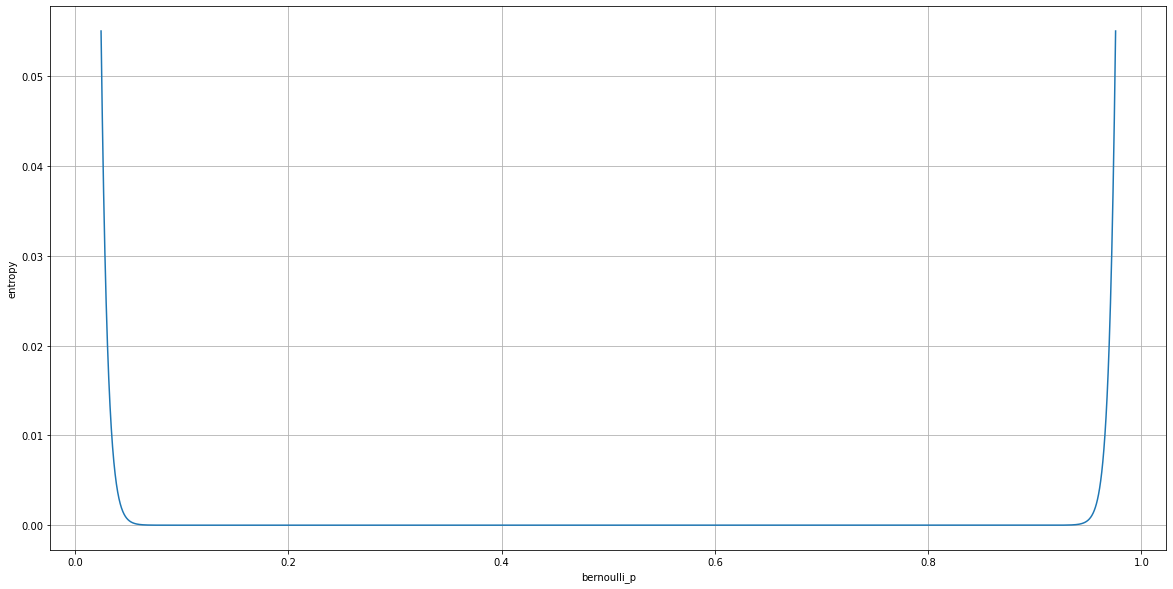

In [233]:
ax=None
ax = plot_pdf(calculate_n_sample_entropy, ax=ax, n_samples=200)
plt.show()

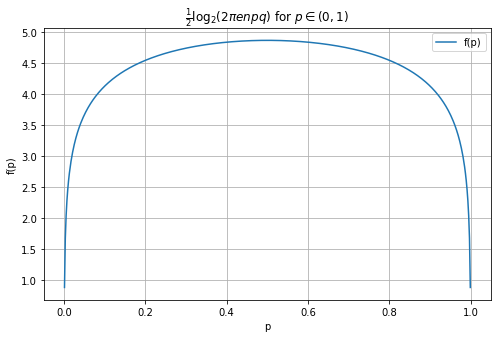

In [252]:
# Wikipedia version of shannon entropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define constants
n = 200  # Example value for n, change as needed
pi_e = 2 * np.pi * np.e  # 2 * pi * e

# Define the function
def myfunc(p):
    q = 1 - p
    return 0.5 * np.log2(pi_e * n * p * q)

# Generate values for p in (0,1) (excluding 0 and 1 to avoid log(0) issues)
p_values = np.linspace(0.001, 0.999, 500)

# Create a Pandas Series
myfunc_series = pd.Series([myfunc(p) for p in p_values], index=p_values, name="f(p)")

# Plot using Pandas
plt.figure(figsize=(8, 5))
myfunc_series.plot(title=r"$\frac{1}{2} \log_2(2\pi e n p q)$ for $p \in (0,1)$",
                   grid=True, xlabel="p", ylabel="f(p)", legend=True)
plt.show()


Q: Why doesn't this match my attempted plot f shannon entropy^?

### Another Context view

Plot the CDF for different values of bernoulli_p
* Consider that the q=1/2 method picks the bernoulli_p which has its median at the outturn of n_successes

In [347]:
"""Plot Binomial CDF for different probabilities of success."""
from typing import List, Dict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import pandas as pd


def plot_binomial_cdf(n: int, p_values: List[float]) -> Dict[str, pd.Series]:
    """
    Plot and return Binomial CDFs for different success probabilities.

    Args:
        n: Number of Bernoulli trials
        p_values: List of success probabilities to plot

    Returns:
        Dictionary of pandas Series containing CDF values, keyed by probability
    """
    k_values = np.arange(n + 1)
    series_dict = {}

    plt.figure(figsize=(10, 6))
    
    for p in p_values:
        cdf = binom.cdf(k_values, n, p)
        series = pd.Series(cdf, index=k_values, name=f'p={p}')
        series_dict[f'p={p}'] = series
        
        plt.step(k_values, cdf, where='post', label=f'p = {p:.2f}', marker='*')

    plt.title(f'Binomial CDF (n = {n} Trials)')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Cumulative Probability')
    plt.xticks(k_values)
    plt.yticks(np.linspace(0, 1, 11))
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

    return series_dict

In [348]:
"""
# Print resulting series
for prob, series in binomial_series.items():
    print(f"\nCDF Series for {prob}:")
    print(series.to_string(float_format=lambda x: f"{x:.6f}"))
"""

'\n# Print resulting series\nfor prob, series in binomial_series.items():\n    print(f"\nCDF Series for {prob}:")\n    print(series.to_string(float_format=lambda x: f"{x:.6f}"))\n'

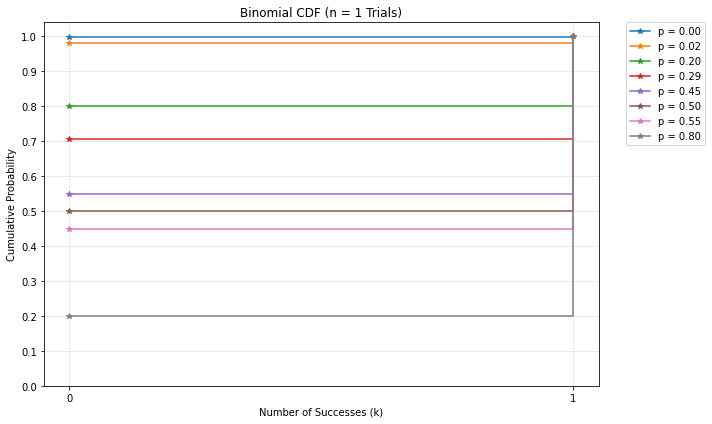

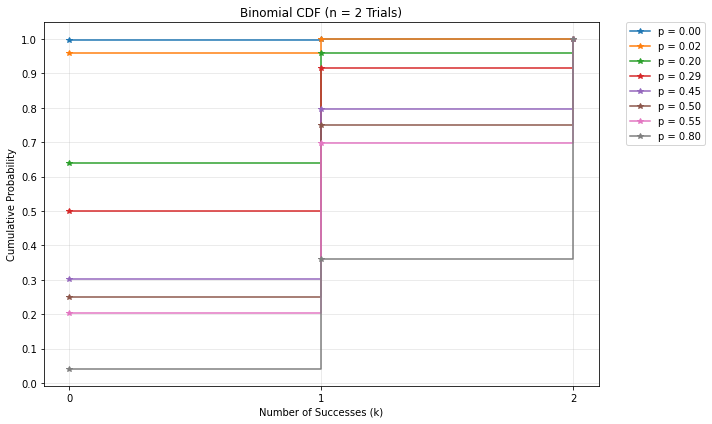

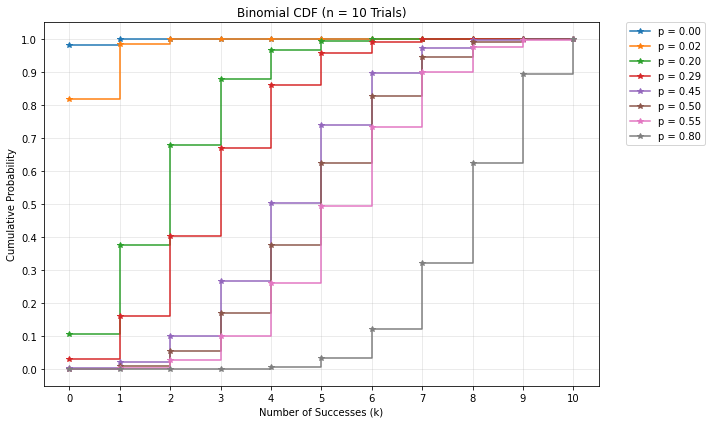

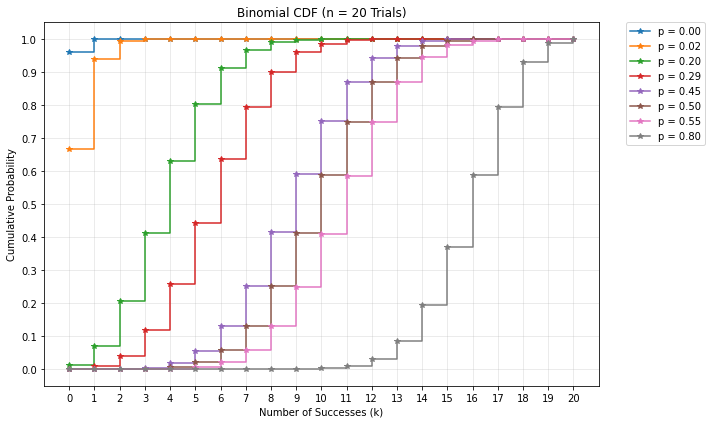

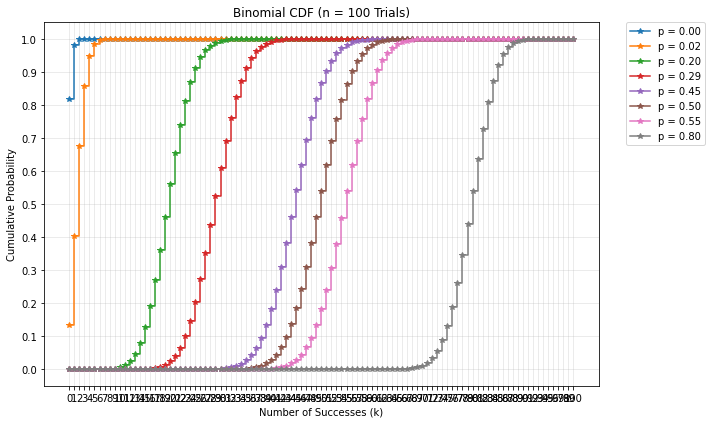

In [365]:
n_values = [1,2,10,20,100]

for n in n_values:
    binomial_series = plot_binomial_cdf(n, p_values=[0.002, 0.02, 0.2, 
                                                     0.29289,  # Solution for median quantile in n=2 binomial
                                                     0.45, 0.5, 0.55, 0.8])

### Discrete PDF Correction of CDF

The CDF logic needs to be corrected because Binomial is a discrete distribution
* If solving with the median method (put half of distribution on each side of the outcome)
    * Using the standard <= cdf is undefined when k=n (successes=samples)
        * because no p can put the event at the median
        * For example observing k=n when n=1,2,3 all values of p put 100% of the distribution <= observed. (You can't find p to put cumulative density function of the event at 0.5)
    * You need to have a latency approach (think freezing/evaporation) where the end of one event has identical Quantile to the start of the next event. (quantiles count upwards within events, only)
    * If desired quantile = where one mass ends and the next starts
        * **Your guess (for k) should be between those two masses** (so use half way between)
        * For a single coin toss when you want to be above/below half the outcomes half the time, you pick 0.5 (or any number between 0 and 1)
        * This isn't always a problem, 
            * ~when integrating across quantile space q for example, the q is continuous so you don't need to worry about any exact step change q, I think
            * when choosing binomial_p it's not a problem (k is ambiguous but p can be well defined such as the 0.29... value of bernoulli_p which solves for median in a n=2 binomial)

In [ ]:
Discrete Distribution Examples
* n=1 binomial
    * p=0.5 puts both k=0 and k=1 observations at the median
    * any higher/lower p would fail for both
* n=2 binomial
    * p=0.29... puts k=0 at the median (again any higher/lower fails)
    * 